In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

In [17]:
crypten_data = pd.read_csv('crypten_experiments/datasize_nn.csv', skiprows=(lambda x: (x % 2 != 0)))
crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
14      326.754222      0          64       7500    0.1110     123.076313
15      324.844453      1          64       7500    0.1420     120.906320
16      325.117119      2          64       7500    0.1827     123.195792
17      329.731910      0          64       7500    0.4314     122.990935
18      331.517049      1          64       7500    0.4393     124.898937
19      328.722831      2          64       7500    0.4463     123.569881
20      660.024929      0          64      15000    0.2029     122.754379
21      663.470128      1          64      15000    0.2546     121.724306
22      656.050495      2          64      15000    0.3385     123.370837
23      646.027991      0          64      15000    0.3665     120.036589
24      646.170944      1          64      15000    0.4018     118.788347
25      644.250591      2          64      15000    0.4160     119.101177
26     1315.274356      0          64 

In [18]:
torch_data = pd.read_csv('torch/datasize_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         1.038539      0          64       7500    0.1422       1.025266
1         1.093077      1          64       7500    0.2080       0.974051
2         1.153512      2          64       7500    0.2597       0.961352
3         2.146109      0          64      15000    0.3865       0.958159
4         2.078753      1          64      15000    0.4384       0.935877
5         2.148911      2          64      15000    0.4645       0.966783
6         4.439492      0          64      30000    0.5719       0.990401
7         4.617818      1          64      30000    0.6190       0.902245
8         4.489928      2          64      30000    0.6348       0.932495
9         8.775790      0          64      60000    0.6456       0.899242
10        8.883341      1          64      60000    0.6556       0.922266
11        8.851315      2          64      60000    0.6624       0.902510
12       11.403549      0          32 

In [19]:
nvflare_epoch_data = pd.read_csv('chz-sok-nvflare-experiments/data/datasize_mnist_nn.csv')
nvflare_epoch_data = nvflare_epoch_data.iloc[lambda x: x.index % 6 < 3].reset_index(drop=True)
print(nvflare_epoch_data)

nvflare_data = pd.read_csv('chz-sok-nvflare-experiments/data/total_runtimes_mnist.csv')
print(nvflare_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         0.467024    0.0        64.0     7500.0       NaN            NaN
1         0.474965    0.0        64.0     7500.0       NaN            NaN
2         0.465325    0.0        64.0     7500.0       NaN            NaN
3         0.913200    0.0        64.0    15000.0       NaN            NaN
4         0.911321    0.0        64.0    15000.0       NaN            NaN
5         0.906192    0.0        64.0    15000.0       NaN            NaN
6         1.824936    0.0        64.0    30000.0       NaN            NaN
7         1.841485    0.0        64.0    30000.0       NaN            NaN
8         1.827022    0.0        64.0    30000.0       NaN            NaN
9         3.619622    0.0        64.0    60000.0       NaN            NaN
10        3.612781    0.0        64.0    60000.0       NaN            NaN
11        3.617651    0.0        64.0    60000.0       NaN            NaN
   total_runtime  data_size
0      27.

In [20]:
mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].sum()
print(mean_torch)
total_nvflare = nvflare_data.groupby('data_size')['total_runtime'].sum()
print(total_nvflare)

data_size
7500      1966.687584
15000     3915.995079
30000     7856.698468
60000    15555.583210
Name: epoch_duration, dtype: float64
data_size
7500      9.348697
15000    18.355154
30000    37.917474
60000    88.159836
Name: epoch_duration, dtype: float64
data_size
7500     27.462248
15000    30.414239
30000    33.363375
60000    37.291058
Name: total_runtime, dtype: float64


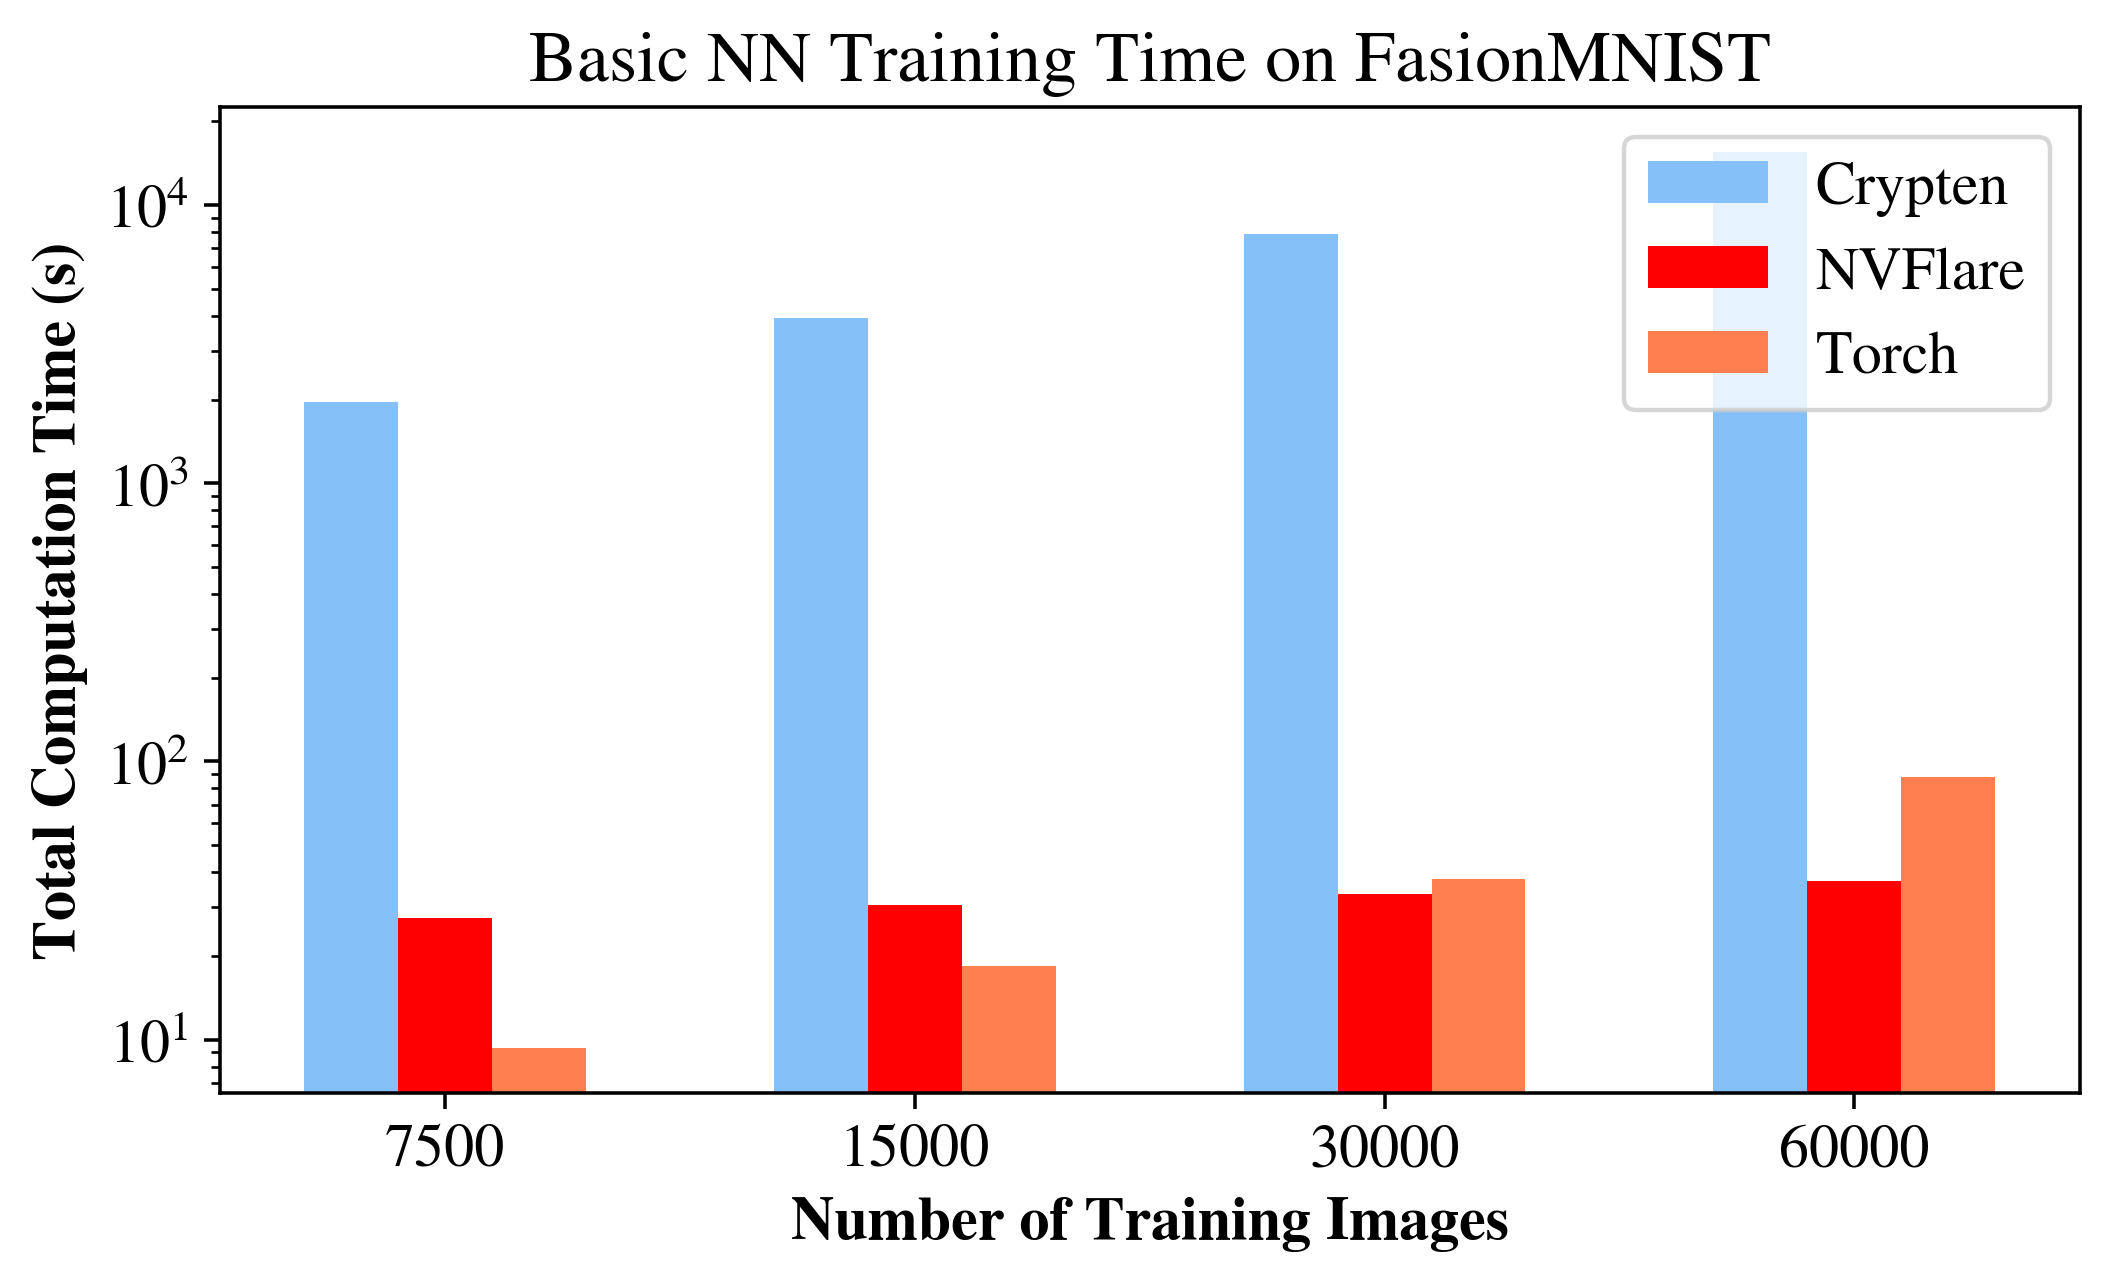

In [21]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis, width=width, height = total_nvflare, label = "NVFlare", color='red')
plt.bar(x=X_axis+width, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_mnist_nn.pdf", bbox_inches='tight')

plt.show()

In [22]:
crypten_data = pd.read_csv('crypten_experiments/minibatch_nn.csv', skiprows=(lambda x: (x % 2 != 0)))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      4058.112869      0          32      60000    0.5861     124.230878
1      4040.735099      1          32      60000    0.6344     124.661488
2      4018.547428      2          32      60000    0.6609     123.858050
3      2578.892717      0          64      60000    0.4682     124.187062
4      2589.689871      1          64      60000    0.5249     123.341897
5      2561.440514      2          64      60000    0.5952     124.634675
6      1829.955021      0         128      60000    0.2654     123.257696
7      1833.037463      1         128      60000    0.4154     123.683946
8      1827.858069      2         128      60000    0.4971     124.534788
9      1419.349082      0         256      60000    0.2491     122.528128
10     1421.839349      1         256      60000    0.3180     123.020656
11     1426.853993      2         256      60000    0.3520     121.501326


In [23]:
torch_data = pd.read_csv('torch/minibatch_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0        11.568936      0          32      60000    0.5408       1.001559
1        12.487438      1          32      60000    0.6326       0.891661
2        12.977742      2          32      60000    0.6579       0.891449
3         9.776157      0          64      60000    0.6733       0.900894
4        10.303210      1          64      60000    0.6842       1.055882
5        11.459164      2          64      60000    0.6972       0.930882
6         8.179447      0         128      60000    0.7032       0.919338
7         9.288245      1         128      60000    0.7108       0.924267
8         8.903856      2         128      60000    0.7168       0.996671
9         7.397617      0         256      60000    0.7194       0.913545
10        7.250790      1         256      60000    0.7227       1.054831
11        7.416602      2         256      60000    0.7265       0.937437
12       14.584049      0          32 

In [24]:
mean_crypten = crypten_data.groupby('batch_size')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('batch_size')['epoch_duration'].sum()
print(mean_torch)

batch_size
32     12117.395396
64      7730.023102
128     5490.850553
256     4268.042424
Name: epoch_duration, dtype: float64
batch_size
32     131.895699
64      91.523236
128     83.696866
256     65.998613
Name: epoch_duration, dtype: float64


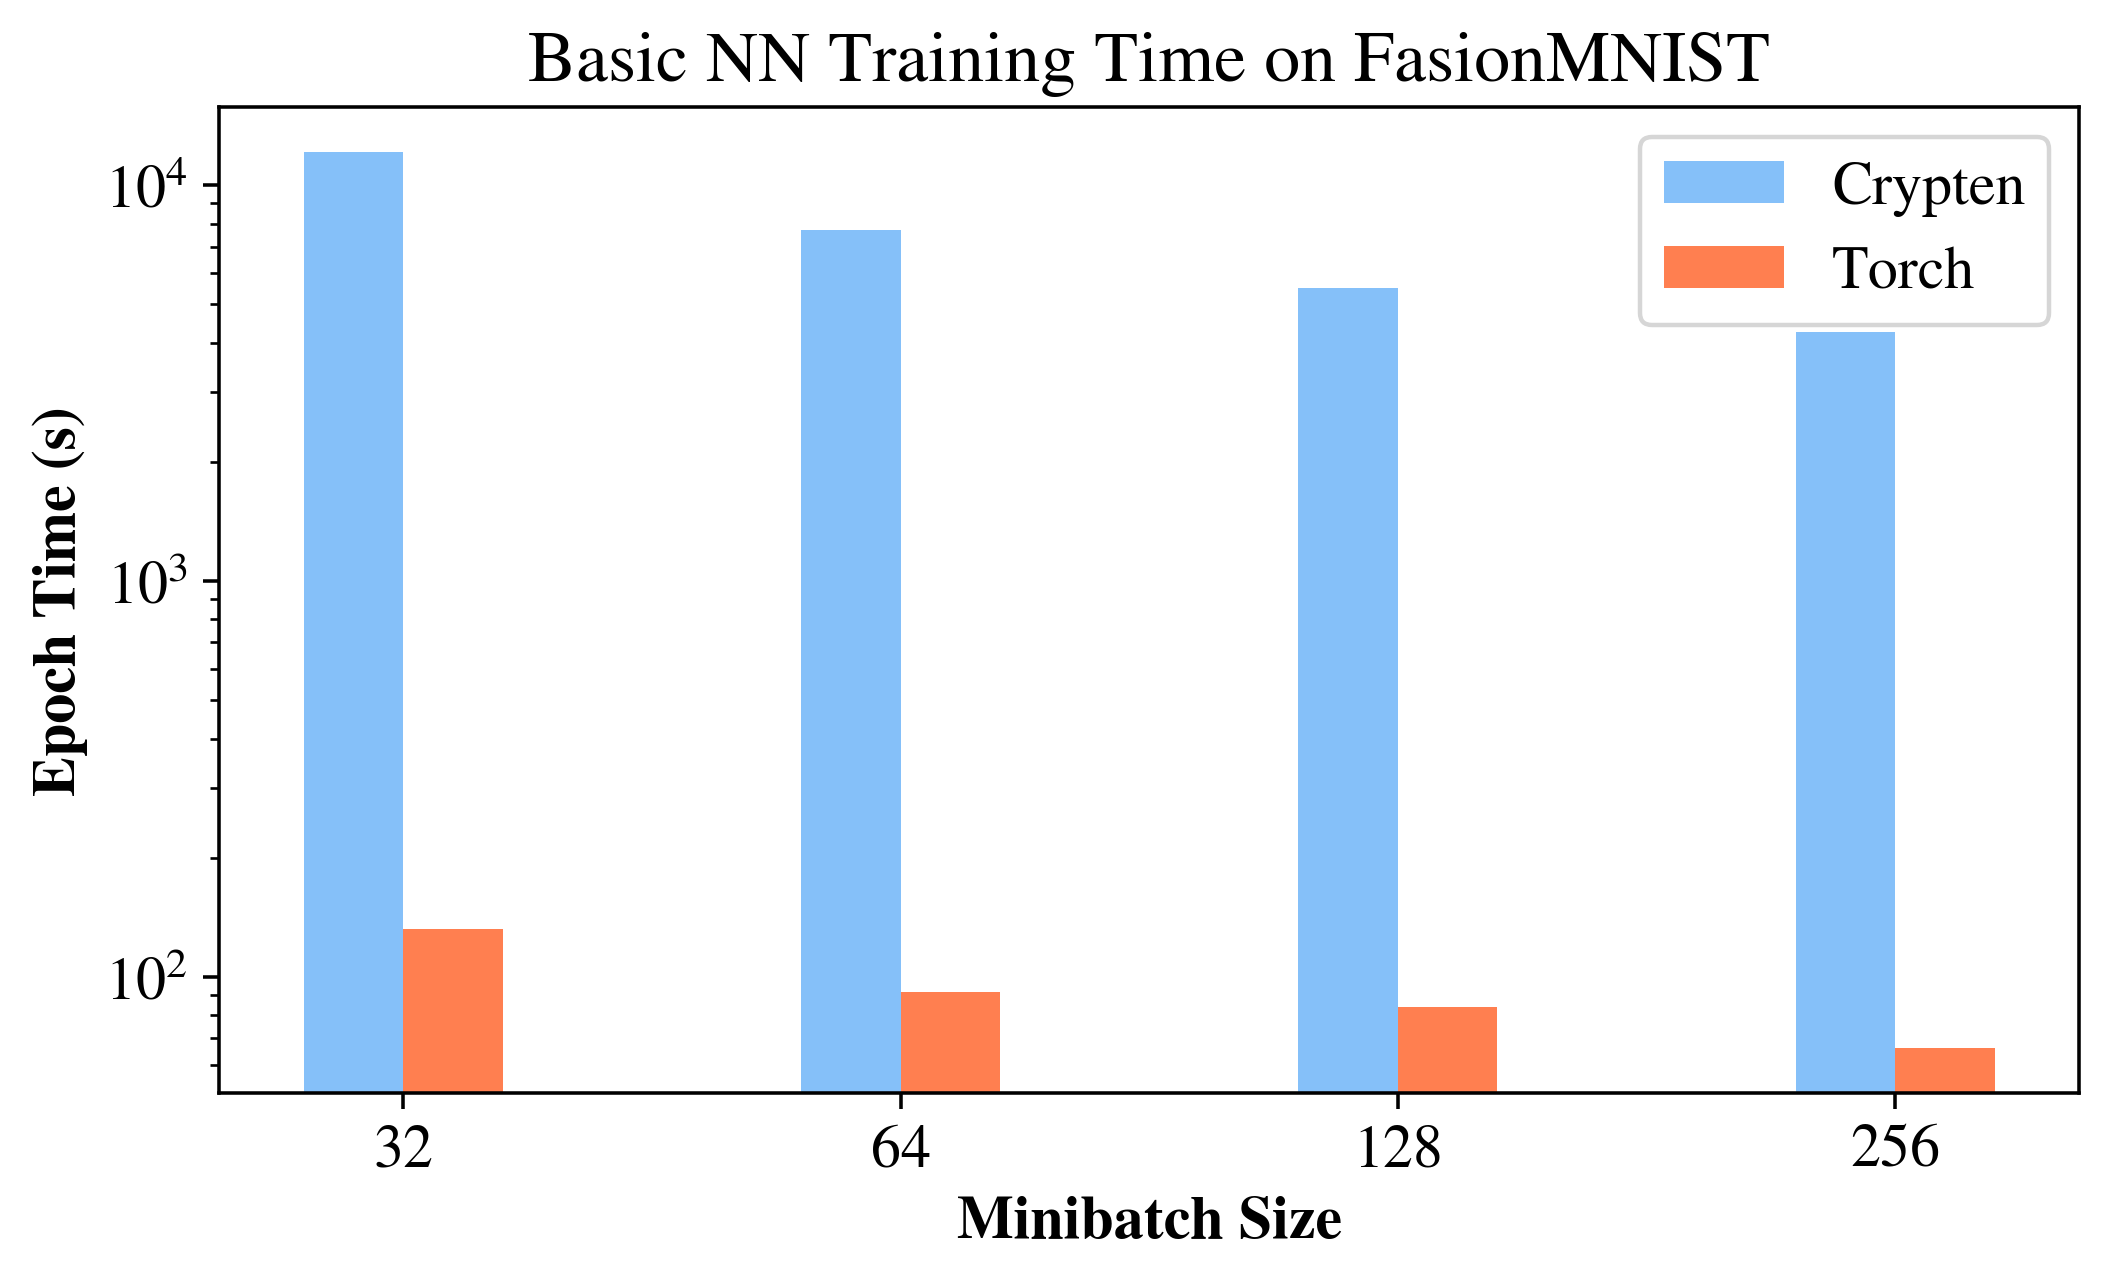

In [25]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis+width/2, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Minibatch Size", fontweight="bold")
plt.ylabel("Epoch Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["32", "64", "128", "256"])

plt.savefig("nn_minibatch.pdf", bbox_inches='tight')

plt.show()

In [26]:
crypten_data = pd.read_csv('crypten_experiments/datasize_cifar_nn.csv', skiprows=(lambda x: (x % 2 != 0)))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      2541.465446      0           4       7500    0.1416    1816.052601
1      2590.844796      1           4       7500    0.1507    1841.071766
2      2610.943532      2           4       7500    0.1558    1844.078777
3      5231.356476      0           4      15000    0.1254    1847.356387
4      5228.616836      1           4      15000    0.1533    1836.973446
5      5231.585884      2           4      15000    0.2129    1836.477785
6     10321.605624      0           4      30000    0.1361    1825.211917
7     10479.325909      1           4      30000    0.2587    1905.839594
8     10910.824670      2           4      30000    0.3095    1862.849678
9     17390.612694      0           4      50000    0.2108    1837.906800
10    17500.806202      1           4      50000    0.3117    1851.253568
11    17523.307491      2           4      50000    0.3963    1833.745015


In [27]:
torch_data = pd.read_csv('torch/datasize_cifar_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         3.894230      0           4       7500    0.1032       3.021972
1         3.875710      1           4       7500    0.1304       3.021197
2         3.910347      2           4       7500    0.1352       3.043607
3         7.821767      0           4      15000    0.1219       3.037747
4         7.795514      1           4      15000    0.1531       3.027073
5         7.786953      2           4      15000    0.1582       3.012410
6        15.624297      0           4      30000    0.1709       3.050010
7        15.642264      1           4      30000    0.2689       3.050948
8        15.664755      2           4      30000    0.3410       3.047203
9        25.906126      0           4      50000    0.1747       2.998784
10       25.910406      1           4      50000    0.3497       3.017611
11       25.935430      2           4      50000    0.4133       3.012618


In [28]:
nvflare_epoch_data = pd.read_csv('chz-sok-nvflare-experiments/data/datasize_cifar_nn.csv')
nvflare_epoch_data = nvflare_epoch_data.iloc[lambda x: x.index % 6 < 3].reset_index(drop=True)
nvflare_epoch_data = nvflare_epoch_data[nvflare_epoch_data["batch_size"] == 4.0]
# nvflare_data = nvflare_data.iloc[::6].reset_index(drop=True)
print(nvflare_epoch_data)

nvflare_data = pd.read_csv('chz-sok-nvflare-experiments/data/total_runtimes_cifar.csv')
nvflare_data = nvflare_data[nvflare_data["batch_size"] == 4.0]
print(nvflare_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0        13.391746    0.0         4.0    50000.0       NaN            NaN
1        13.203454    0.0         4.0    50000.0       NaN            NaN
2        13.261821    0.0         4.0    50000.0       NaN            NaN
3         7.972630    0.0         4.0    30000.0       NaN            NaN
4         7.967436    0.0         4.0    30000.0       NaN            NaN
5         7.945783    0.0         4.0    30000.0       NaN            NaN
6         4.006084    0.0         4.0    15000.0       NaN            NaN
7         3.972016    0.0         4.0    15000.0       NaN            NaN
8         3.971599    0.0         4.0    15000.0       NaN            NaN
9         2.034443    0.0         4.0     7500.0       NaN            NaN
10        1.983217    0.0         4.0     7500.0       NaN            NaN
11        1.979934    0.0         4.0     7500.0       NaN            NaN
   total_runtime  batch_size  data_siz

In [29]:
mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].sum()
print(mean_torch)
total_nvflare = nvflare_data.groupby('data_size')['total_runtime'].sum()
print(total_nvflare)

data_size
7500      7743.253773
15000    15691.559196
30000    31711.756203
50000    52414.726387
Name: epoch_duration, dtype: float64
data_size
7500     11.680287
15000    23.404234
30000    46.931316
50000    77.751962
Name: epoch_duration, dtype: float64
data_size
7500     36.666779
15000    42.758883
30000    54.892391
50000    73.003241
Name: total_runtime, dtype: float64


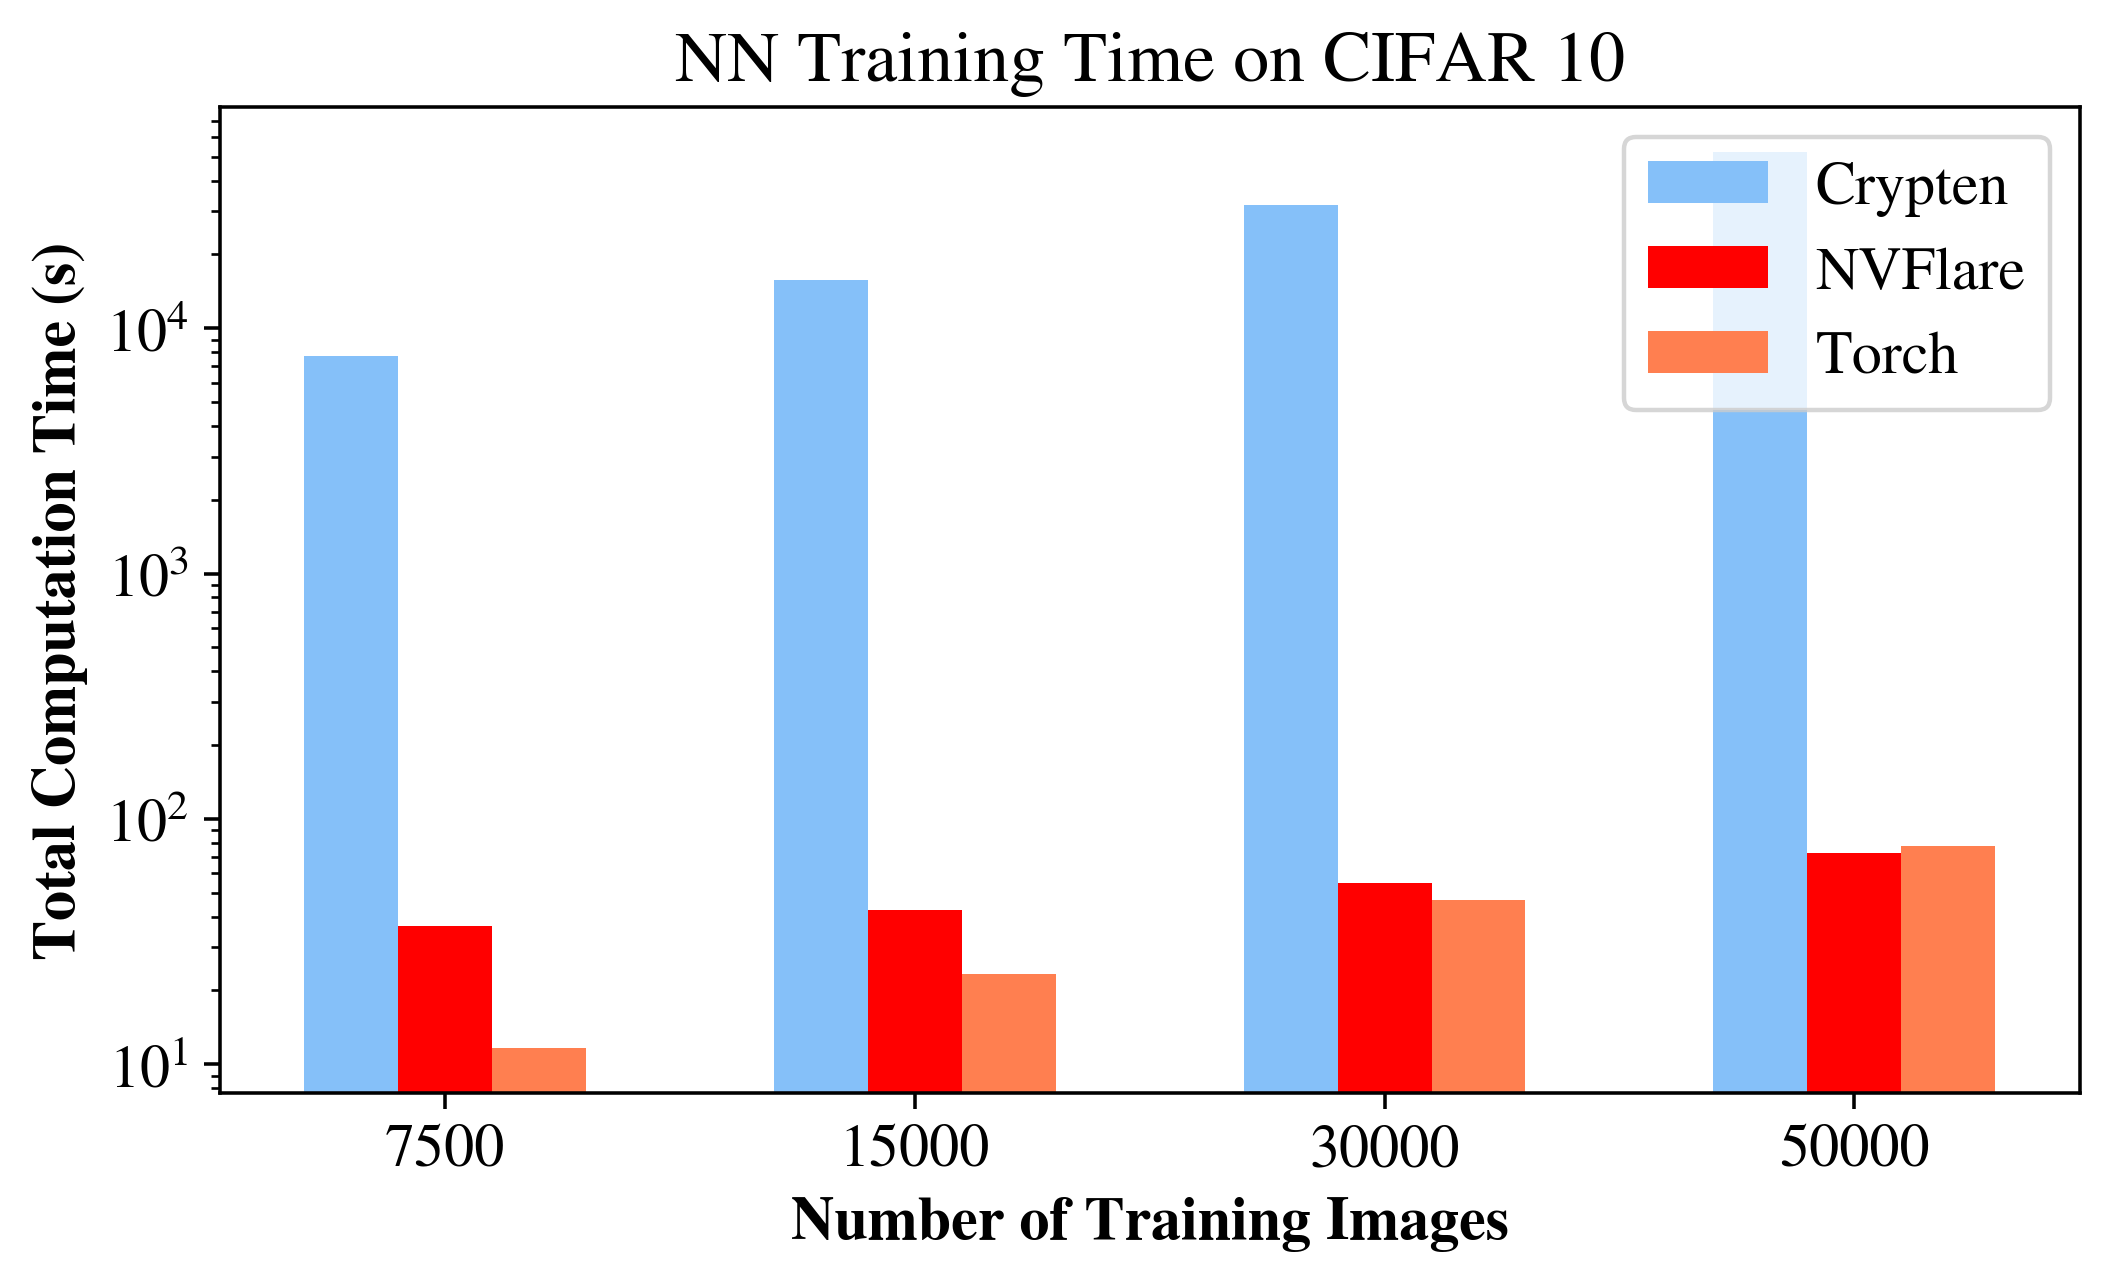

In [30]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis, width=width, height = total_nvflare, label = "NVFlare", color='red')
plt.bar(x=X_axis+width, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
plt.title("NN Training Time on CIFAR 10")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "50000"])

plt.savefig("datasize_cifar_nn.pdf", bbox_inches='tight')

plt.show()